In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from rubin_sim.maf import radar, norm_df

In [2]:
df = pd.read_pickle('2.0combined_stats.pkl')

new_index = [name.replace('_10yrs', '') for name in df.index]
df.index=new_index


df21 = pd.read_pickle('2.1combined_stats.pkl')
new_index = [name.replace('_10yrs', '') for name in df21.index]
df21.index=new_index


In [3]:
df = pd.concat([df,df21])

In [4]:
[name for name in df.columns if 'Brown' in name]

['VolumeSum Brown Dwarf, L7  HealpixSlicer',
 'VolumeSum Brown Dwarf, L4  HealpixSlicer']

In [5]:
name_dict = {'best18k parallax  HealpixSlicer': 'parallax',
            'best18k properMotion  HealpixSlicer': 'proper motion',
            'Fraction detected of total (mean) MicrolensingMetric_detect tE 5_10 days UserPointsSlicer': 'fast microlensing',
            'Fraction detected of total (mean) MicrolensingMetric_detect tE 60_90 days UserPointsSlicer': 'slow microlensing',
            'fONv MedianNvis fO  HealpixSlicer': 'fO N vis',
            'CumulativeCompleteness H <= 16.000000 Discovery_N_Chances NEO 3 pairs in 15 nights detection loss MoObjSlicer': 'NEO H<=16',
            'CumulativeCompleteness H <= 22.000000 Discovery_N_Chances NEO 3 pairs in 15 nights detection loss MoObjSlicer': 'NEO H<=22',
            'CumulativeCompleteness H <= 6.000000 Discovery_N_Chances TNO 3 pairs in 15 nights detection loss MoObjSlicer': 'TNO H<=6',
             'Total detected SNNSNMetric_nSN  HealpixSlicer': 'SNe, N',
             'Median SNNSNMetric_zlim  HealpixSlicer': 'SNe, zlim',
            #'Total detected TDE_Quality__some_color_pnum  UserPointsSlicer': 'TDE',
            '3x2ptFoM ExgalM5_with_cuts i band non-DD year 10 HealpixSlicer': '3x2',
            'Median WeakLensingNvisits i band non-DD HealpixSlicer': 'WL',
            'Sum PrestoKNe__scoreS  UserPointsSlicer': 'Transients, KNe',
            'Total detected XRBPopMetric__early_detect  UserPointsSlicer': 'XRB',
            'VolumeSum Brown Dwarf, L7  HealpixSlicer': 'Brown Dwarf Vol',}
invert_cols = ['parallax', 'proper motion']

data = pd.DataFrame()
for key in name_dict:
    data[name_dict[key]] = df[key]

mag_name_dict = {}
for filtername in 'ugrizy':
    mag_name_dict['Median CoaddM5 %s HealpixSlicer' % filtername] = filtername

mag_data = pd.DataFrame()
for key in mag_name_dict:
    mag_data[mag_name_dict[key]] = df[key]

In [6]:
df

metric                     Length of Survey (days)  \
baseline_retrofoot_v2.0                3652.104322   
baseline_v2.0                          3652.104333   
bluer_indx0_v2.0                       3652.104250   
bluer_indx1_v2.0                       3652.104303   
carina_v2.0                            3652.104419   
...                                            ...   
twi_neo_nightpattern3v2.1              3652.104070   
twi_neo_nightpattern4v2.1              3652.104117   
twi_neo_nightpattern5v2.1              3652.104286   
twi_neo_nightpattern6v2.1              3652.104405   
twi_neo_nightpattern7v2.1              3652.104267   

metric                     NChanges filter, observationStartMJD  \
baseline_retrofoot_v2.0                                 34678.0   
baseline_v2.0                                           34812.0   
bluer_indx0_v2.0                                        34488.0   
bluer_indx1_v2.0                                        34491.0   
carina_v2.0                                             30852.0   
...                                                         ...   
twi_neo_nightpattern3v2.1                               34959.0   
twi_neo_nightpattern4v2.1                               34844.0   
twi_neo_nightpattern5v2.1                               35173.0   
twi_neo_nightpattern6v2.1                               35128.0   
twi_neo_nightpattern7v2.1                               34871.0   

metric                     OpenShutterFraction      tEff  Number of Exposures  \
baseline_retrofoot_v2.0               0.722316  0.588588            2086534.0   
baseline_v2.0                         0.722458  0.569799            2086980.0   
bluer_indx0_v2.0                      0.722881  0.568914            2088051.0   
bluer_indx1_v2.0                      0.723220  0.571559            2089107.0   
carina_v2.0                           0.722543  0.565177            2087222.0   
...                                        ...       ...                  ...   
twi_neo_nightpattern3v2.1             0.717770  0.556405            2113509.0   
twi_neo_nightpattern4v2.1             0.718497  0.560771            2104713.0   
twi_neo_nightpattern5v2.1             0.716410  0.547465            2130087.0   
twi_neo_nightpattern6v2.1             0.716795  0.551322            2123468.0   
twi_neo_nightpattern7v2.1             0.717879  0.556632            2113904.0   

metric                     Sum SkySaturation  Slew Count All visits  \
baseline_retrofoot_v2.0                  0.0              2086534.0   
baseline_v2.0                            0.0              2086980.0   
bluer_indx0_v2.0                         0.0              2088051.0   
bluer_indx1_v2.0                         0.0              2089107.0   
carina_v2.0                              0.0              2087222.0   
...                                      ...                    ...   
twi_neo_nightpattern3v2.1                0.0              2113509.0   
twi_neo_nightpattern4v2.1                0.0              2104713.0   
twi_neo_nightpattern5v2.1                0.0              2130087.0   
twi_neo_nightpattern6v2.1                0.0              2123468.0   
twi_neo_nightpattern7v2.1                0.0              2113904.0   

metric                     Mean slewTime All visits  \
baseline_retrofoot_v2.0                    7.728750   
baseline_v2.0                              7.718367   
bluer_indx0_v2.0                           7.692650   
bluer_indx1_v2.0                           7.697270   
carina_v2.0                                7.714250   
...                                             ...   
twi_neo_nightpattern3v2.1                  7.872449   
twi_neo_nightpattern4v2.1                  7.862787   
twi_neo_nightpattern5v2.1                  7.891629   
twi_neo_nightpattern6v2.1                  7.892662   
twi_neo_nightpattern7v2.1                  7.866576   

metric                     Median slewTime All visits  \
ba

In [7]:
df.columns[1000]

'CumulativeCompleteness@Time@H=18.00 H <=18.0 @ 61373.83 Discovery_Time Trojan 3 pairs in 15 nights detection loss MoObjSlicer'

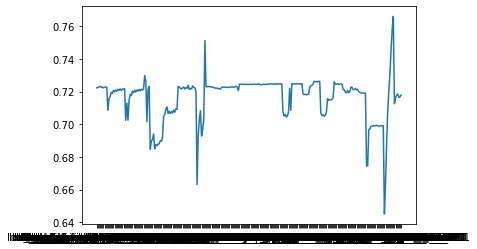

In [8]:
plt.plot(df['OpenShutterFraction'])

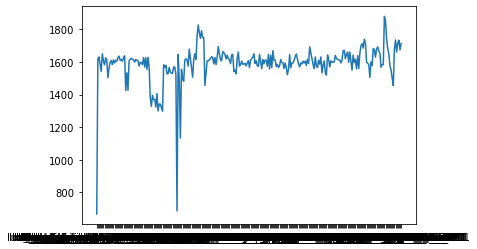

In [9]:
plt.plot(data['XRB'])

In [10]:
df['OpenShutterFraction'].values.max()

0.7661039790105743

In [11]:
[ack for ack in df.columns if 'SNN' in ack]

['Median SNNSNMetric_nSN  HealpixSlicer',
 'Mean SNNSNMetric_nSN  HealpixSlicer',
 'Total detected SNNSNMetric_nSN  HealpixSlicer',
 'Total on sky SNNSNMetric_nSN  HealpixSlicer',
 'Median SNNSNMetric_zlim  HealpixSlicer',
 'Mean SNNSNMetric_zlim  HealpixSlicer',
 'Total detected SNNSNMetric_zlim  HealpixSlicer',
 'Total on sky SNNSNMetric_zlim  HealpixSlicer']

In [12]:
runs = [run for run in df.index if 'baseline' in run]

In [13]:
data.loc[runs]

parallax  proper motion  fast microlensing  \
baseline_retrofoot_v2.0  0.771444       0.176553             0.0472   
baseline_v2.0            0.791058       0.184088             0.1580   
retro_baseline_v2.0      0.804328       0.176701             0.0385   
baseline_v2.1            0.806910       0.188258             0.1535   

                         slow microlensing  fO N vis  NEO H<=16  NEO H<=22  \
baseline_retrofoot_v2.0             0.2064     875.0     0.9260   0.567062   
baseline_v2.0                       0.4284     839.0     0.9298   0.577476   
retro_baseline_v2.0                 0.1533     848.0     0.9094   0.566200   
baseline_v2.1                       0.4312     838.0     0.9296   0.581853   

                         TNO H<=6     SNe, N  SNe, zlim        3x2     WL  \
baseline_retrofoot_v2.0  0.676619  25380.501      0.200  33.991288  193.0   
baseline_v2.0            0.695976  25374.969      0.225  37.908126  186.0   
retro_baseline_v2.0      0.682227  19562.783      0.250  34.625891  186.0   
baseline_v2.1            0.699244  25120.276      0.200  38.560143  187.0   

                         Transients, KNe     XRB  Brown Dwarf Vol  
baseline_retrofoot_v2.0            178.0   668.0    172437.323885  
baseline_v2.0                      179.0  1620.0    168086.074111  
retro_baseline_v2.0                156.0   687.0    179640.718155  
baseline_v2.1                      167.0  1661.0    163815.013503

Text(0, 0.5, 'N SNe')

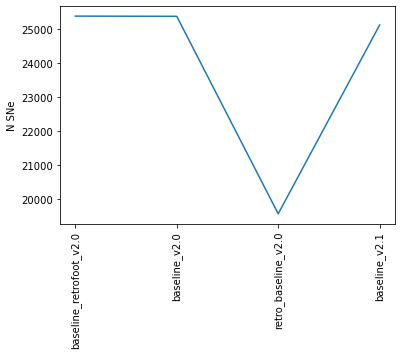

In [14]:
# Turning on rolling gives a big boost in SNe
fig, ax = plt.subplots()
ax.plot(df['Total detected SNNSNMetric_nSN  HealpixSlicer'][runs])
ack = ax.tick_params('x',  rotation=90)
ax.set_ylabel('N SNe')

In [15]:

ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.1')


In [16]:
ndata

parallax  proper motion  fast microlensing  \
baseline_retrofoot_v2.0  1.045973       1.066295           0.307492   
baseline_v2.0            1.020038       1.022650           1.029316   
retro_baseline_v2.0      1.003210       1.065402           0.250814   
baseline_v2.1            1.000000       1.000000           1.000000   

                         slow microlensing  fO N vis  NEO H<=16  NEO H<=22  \
baseline_retrofoot_v2.0           0.478664  1.044153   0.996127   0.974581   
baseline_v2.0                     0.993506  1.001193   1.000215   0.992478   
retro_baseline_v2.0               0.355519  1.011933   0.978270   0.973098   
baseline_v2.1                     1.000000  1.000000   1.000000   1.000000   

                         TNO H<=6    SNe, N  SNe, zlim       3x2        WL  \
baseline_retrofoot_v2.0  0.967644  1.010359      1.000  0.881514  1.032086   
baseline_v2.0            0.995327  1.010139      1.125  0.983091  0.994652   
retro_baseline_v2.0      0.975665  0.778765      1.250  0.897971  0.994652   
baseline_v2.1            1.000000  1.000000      1.000  1.000000  1.000000   

                         Transients, KNe       XRB  Brown Dwarf Vol  
baseline_retrofoot_v2.0         1.065868  0.402167         1.052634  
baseline_v2.0                   1.071856  0.975316         1.026072  
retro_baseline_v2.0             0.934132  0.413606         1.096607  
baseline_v2.1                   1.000000  1.000000         1.000000

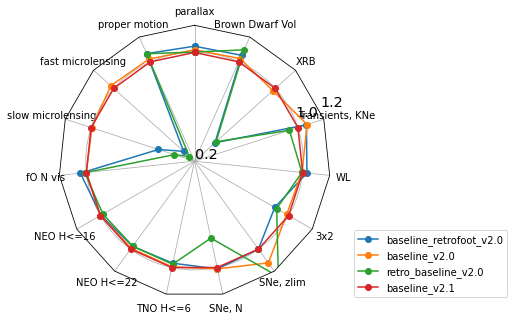

In [17]:


fig, ax = radar(ndata, legend=True, rgrids=[0.2, 1.0, 1.2], bbox_to_anchor=(1.65, 0))
fig.savefig('baseline2_radar.pdf', bbox_inches="tight")

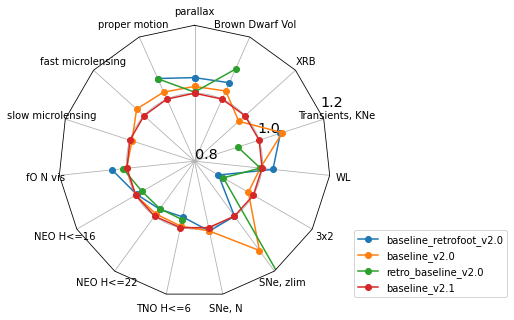

In [18]:
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(1.65, 0))
fig.savefig('baseline2_radar_zoom.pdf', bbox_inches="tight")

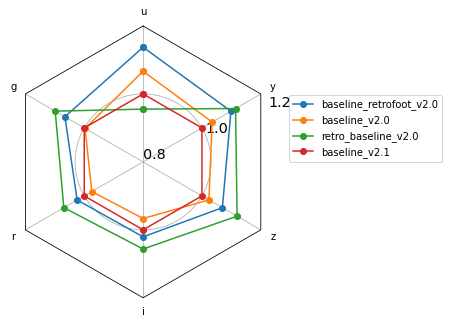

In [19]:
data_normed = norm_df(mag_data, runs, ['u', 'g', 'r', 'i', 'z', 'y'], norm_run='baseline_v2.1',
                      invert_cols=None, mag_cols='all')
#data_normed = data_normed.rename(columns=mag_name_mapper)

fig, ax = radar(data_normed, legend=True, rgrids=[.80, 1.0, 1.2])
fig.savefig('baselines_mags.pdf', bbox_inches="tight")

In [20]:
mag_data.loc[runs]

u          g          r          i  \
baseline_retrofoot_v2.0  25.889514  26.802069  26.805706  26.272641   
baseline_v2.0            25.818916  26.733479  26.755971  26.218659   
retro_baseline_v2.0      25.707301  26.835006  26.850968  26.308518   
baseline_v2.1            25.751969  26.736248  26.781543  26.252054   

                                 z          y  
baseline_retrofoot_v2.0  25.556130  24.826652  
baseline_v2.0            25.510379  24.762720  
retro_baseline_v2.0      25.606168  24.842363  
baseline_v2.1            25.486640  24.728145

Text(0, 0.5, 'MBA')

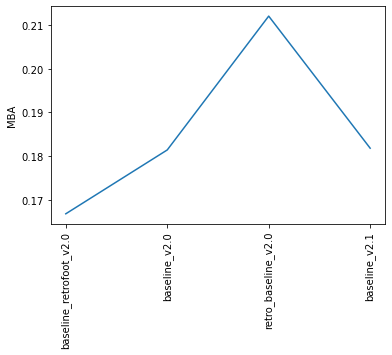

In [21]:
mba = 'DifferentialCompleteness H = 21.000000 Discovery_N_Chances MBA 3 pairs in 15 nights trailing loss MoObjSlicer'
fig, ax = plt.subplots()
ax.plot(df[mba][runs])
ack = ax.tick_params('x',  rotation=90)
ax.set_ylabel('MBA')

In [22]:
df[mba][runs]

baseline_retrofoot_v2.0    0.166833
baseline_v2.0              0.181436
retro_baseline_v2.0        0.212042
baseline_v2.1              0.181836
Name: DifferentialCompleteness H = 21.000000 Discovery_N_Chances MBA 3 pairs in 15 nights trailing loss MoObjSlicer, dtype: float64

In [23]:
runs = ['baseline_v2.0'] + [run for run in df.index if 'blue' in run]

In [24]:
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0')


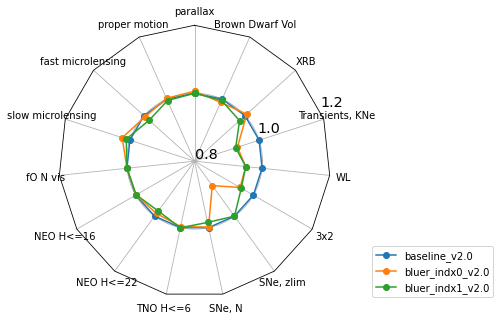

In [25]:
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(1.6, 0))
fig.savefig('bluer.pdf', bbox_inches="tight")

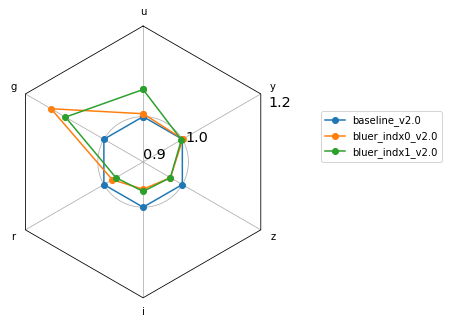

In [26]:

data_normed = norm_df(mag_data, runs, ['u', 'g', 'r', 'i', 'z', 'y'], norm_run='baseline_v2.0',
                      invert_cols=None, mag_cols='all')
#data_normed = data_normed.rename(columns=mag_name_mapper)

fig, ax = radar(data_normed, legend=True, rgrids=[.90, 1.0, 1.2], alpha=.1)
fig.savefig('bluer_mags.pdf', bbox_inches="tight")

In [27]:
low_dust_ratios={"u": 0.32, "g": 0.4, "r": 1.0, "i": 1.0, "z": 0.9, "y": 0.9}
filter_b_list = [low_dust_ratios,{'u': 0.07, 'g': 0.12, 'r': 0.21, 'i': 0.21, 'z': 0.19, 'y': 0.20},
                     {'u': 0.08, 'g': 0.11, 'r': 0.21, 'i': 0.21, 'z': 0.19, 'y': 0.20}]


filter_b_list

[{'u': 0.32, 'g': 0.4, 'r': 1.0, 'i': 1.0, 'z': 0.9, 'y': 0.9},
 {'u': 0.07, 'g': 0.12, 'r': 0.21, 'i': 0.21, 'z': 0.19, 'y': 0.2},
 {'u': 0.08, 'g': 0.11, 'r': 0.21, 'i': 0.21, 'z': 0.19, 'y': 0.2}]

In [28]:
blue_frame = pd.DataFrame(filter_b_list, index=['baseline_v2.0', 'bluer_indx0_v2.0', 'bluer_indx1_v2.0'])

norm_col = blue_frame['r'].values + 0

for col in blue_frame.columns:
    blue_frame[col] = blue_frame[col]/norm_col * 10


print(blue_frame.to_latex(float_format='%.1f'))

\begin{tabular}{lrrrrrr}
\toprule
{} &   u &   g &    r &    i &   z &   y \\
\midrule
baseline\_v2.0    & 3.2 & 4.0 & 10.0 & 10.0 & 9.0 & 9.0 \\
bluer\_indx0\_v2.0 & 3.3 & 5.7 & 10.0 & 10.0 & 9.0 & 9.5 \\
bluer\_indx1\_v2.0 & 3.8 & 5.2 & 10.0 & 10.0 & 9.0 & 9.5 \\
\bottomrule
\end{tabular}



In [29]:
runs = ['baseline_v2.0'] + [run for run in df.index if 'long_u' in run]
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0')


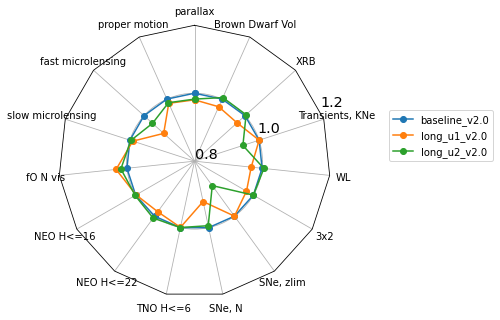

In [30]:
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2])
fig.savefig('long_u.pdf', bbox_inches="tight")

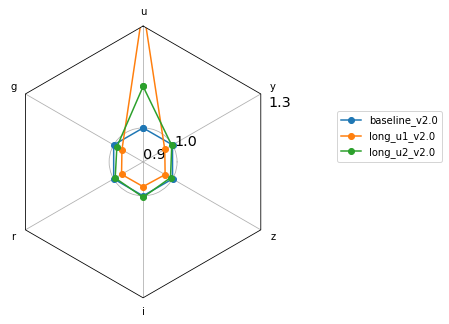

In [31]:
data_normed = norm_df(mag_data, runs, ['u', 'g', 'r', 'i', 'z', 'y'], norm_run='baseline_v2.0',
                      invert_cols=None, mag_cols='all')
#data_normed = data_normed.rename(columns=mag_name_mapper)

fig, ax = radar(data_normed, legend=True, rgrids=[.90, 1.0, 1.3], alpha=.1)
fig.savefig('long_u_mags.pdf', bbox_inches="tight")

In [32]:
runs = ['baseline_v2.0'] + [run for run in df.index if 'rolling_ns' in run]
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0')


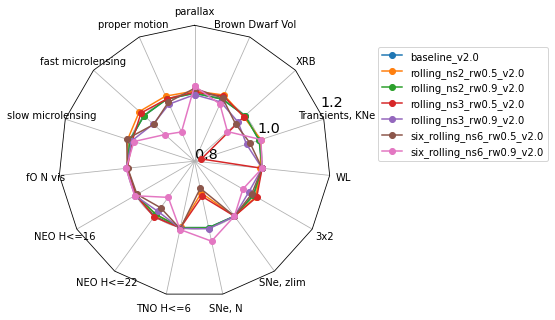

In [33]:
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2],  bbox_to_anchor=(1.8, .5))
fig.savefig('rolling_ns.pdf', bbox_inches="tight")

In [34]:
runs = ['baseline_v2.0'] + [run for run in df.index if 'roll_' in run and 'ddf' not in run]
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0')


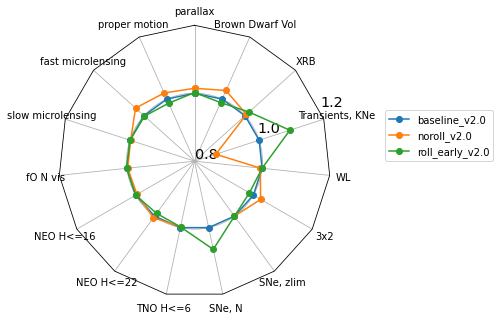

In [35]:
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2])
fig.savefig('rolling_more.pdf', bbox_inches="tight")

In [36]:
runs = ['baseline_v2.0'] + [run for run in df.index if 'rolling_bul' in run]
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0')


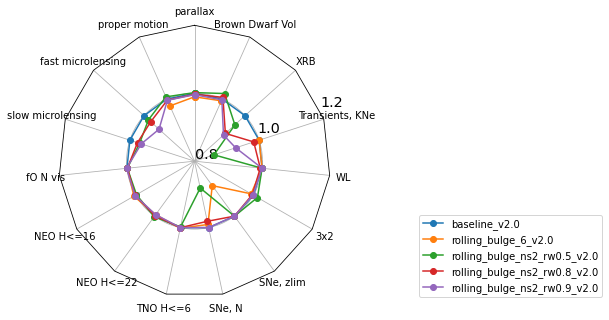

In [37]:
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(2, 0))
fig.savefig('rolling_bulge.pdf', bbox_inches="tight")

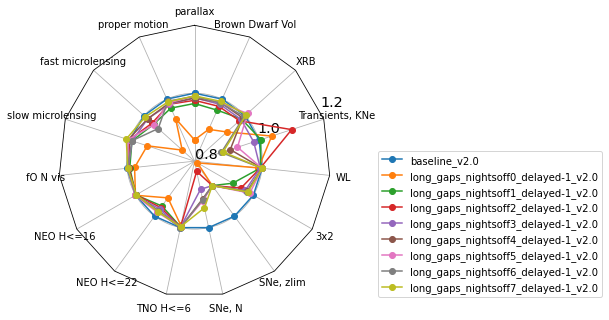

In [38]:
runs = ['baseline_v2.0'] + [run for run in df.index if 'long_gaps_night' in run and '-1' in run] 
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0')
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(2, 0))
fig.savefig('long_gaps.pdf', bbox_inches="tight")

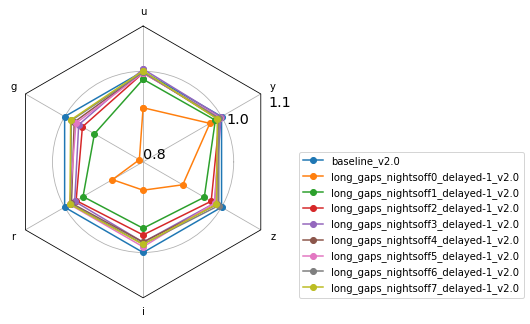

In [39]:
data_normed = norm_df(mag_data, runs, ['u', 'g', 'r', 'i', 'z', 'y'], norm_run='baseline_v2.0',
                      invert_cols=None, mag_cols='all')
#data_normed = data_normed.rename(columns=mag_name_mapper)

fig, ax = radar(data_normed, legend=True, rgrids=[.80, 1.0, 1.1], bbox_to_anchor=(1.9, 0))
fig.savefig('long_gaps_mags.pdf', bbox_inches="tight")

Text(0, 0.5, 'Transient Score')

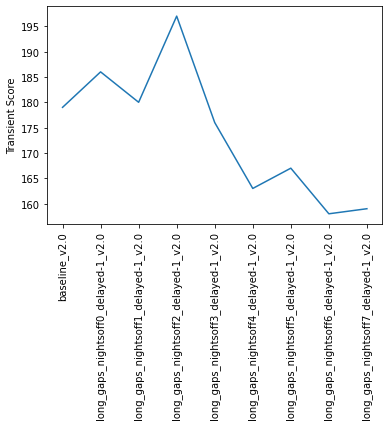

In [40]:
fig, ax = plt.subplots()
ax.plot(df['Sum PrestoKNe__scoreS  UserPointsSlicer'][runs])
ack = ax.tick_params('x',  rotation=90)
ax.set_ylabel('Transient Score')

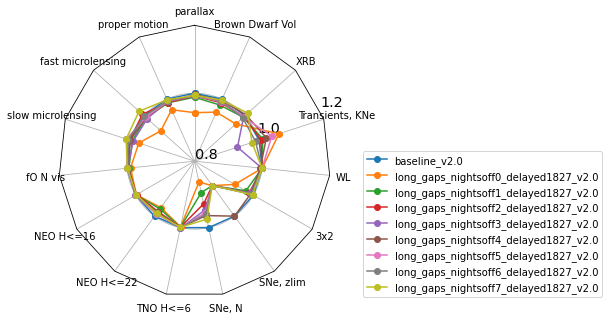

In [41]:
runs = ['baseline_v2.0'] + [run for run in df.index if 'long_gaps_night' in run and '18' in run] 
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0')
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(2, 0))
fig.savefig('long_gaps_delayed.pdf', bbox_inches="tight")

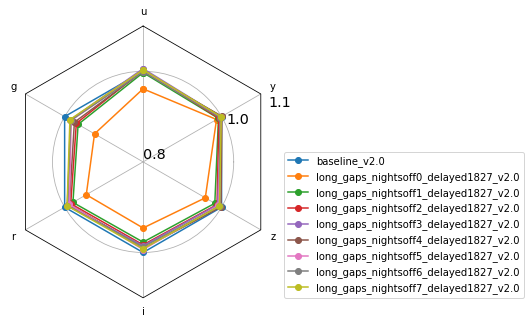

In [42]:
data_normed = norm_df(mag_data, runs, ['u', 'g', 'r', 'i', 'z', 'y'], norm_run='baseline_v2.0',
                      invert_cols=None, mag_cols='all')
#data_normed = data_normed.rename(columns=mag_name_mapper)

fig, ax = radar(data_normed, legend=True, rgrids=[.80, 1.0, 1.1], bbox_to_anchor=(1.9, 0))
fig.savefig('long_gaps_delayed_mags.pdf', bbox_inches="tight")

Text(0, 0.5, 'Transient Score')

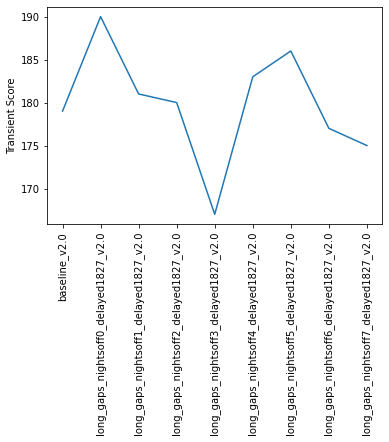

In [43]:
fig, ax = plt.subplots()
ax.plot(df['Sum PrestoKNe__scoreS  UserPointsSlicer'][runs])
ack = ax.tick_params('x',  rotation=90)
ax.set_ylabel('Transient Score')

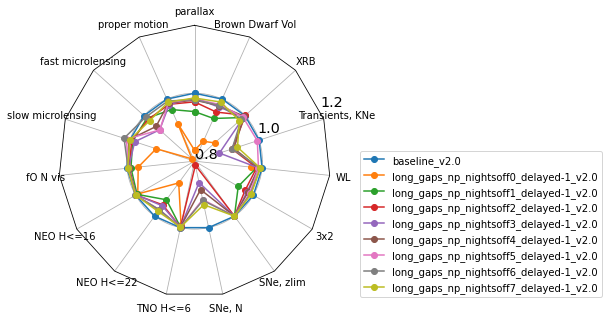

In [44]:
runs = ['baseline_v2.0'] + [run for run in df.index if 'long_gaps_np' in run and '-1' in run] 
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0')
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(2, 0))


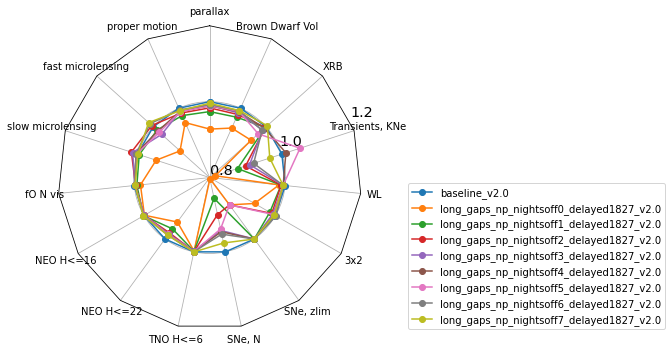

In [45]:
runs = ['baseline_v2.0'] + [run for run in df.index if 'long_gaps_np' in run and '18' in run] 
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0')
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(2, 0))
fig.tight_layout()

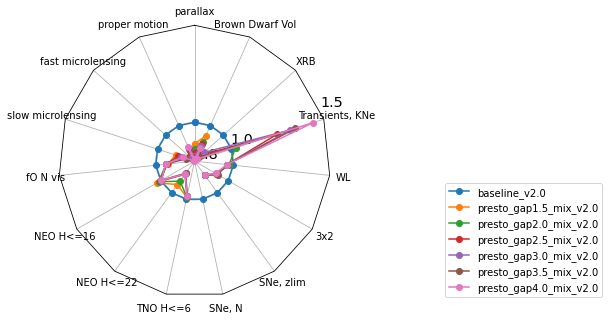

In [46]:
runs = ['baseline_v2.0'] + [run for run in df.index if 'presto_gap' in run and 'mix' in run] 
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0')
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.5], bbox_to_anchor=(2, 0))
fig.savefig('presto_gaps_mix.pdf', bbox_inches="tight")

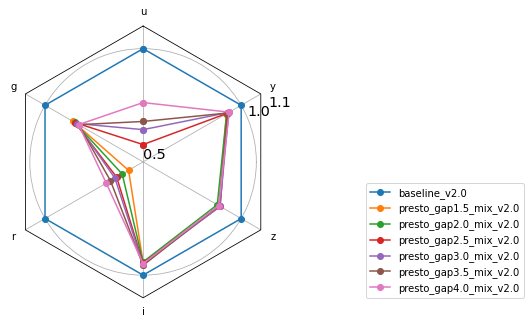

In [47]:
data_normed = norm_df(mag_data, runs, ['u', 'g', 'r', 'i', 'z', 'y'], norm_run='baseline_v2.0',
                      invert_cols=None, mag_cols='all')
#data_normed = data_normed.rename(columns=mag_name_mapper)

fig, ax = radar(data_normed, legend=True, rgrids=[.50, 1.0, 1.1], bbox_to_anchor=(1.9, 0))
fig.savefig('presto_mix_gaps_mags.pdf', bbox_inches="tight")

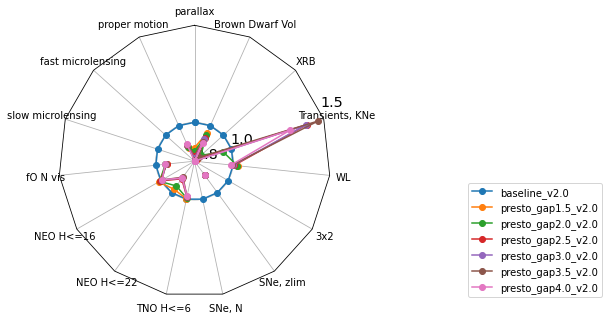

In [48]:
runs = ['baseline_v2.0'] + [run for run in df.index if 'presto_gap' in run and 'mix' not in run] 
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0')
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.5], bbox_to_anchor=(2, 0))
fig.savefig('presto_gap.pdf', bbox_inches="tight")

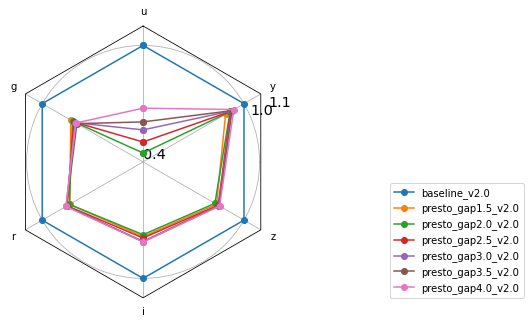

In [49]:
data_normed = norm_df(mag_data, runs, ['u', 'g', 'r', 'i', 'z', 'y'], norm_run='baseline_v2.0',
                      invert_cols=None, mag_cols='all')
#data_normed = data_normed.rename(columns=mag_name_mapper)

fig, ax = radar(data_normed, legend=True, rgrids=[.40, 1.0, 1.1], bbox_to_anchor=(1.9, 0))
fig.savefig('presto_gaps_mags.pdf', bbox_inches="tight")

Text(0, 0.5, 'Transient Score')

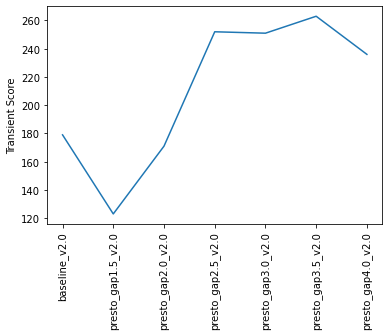

In [50]:
fig, ax = plt.subplots()
ax.plot(df['Sum PrestoKNe__scoreS  UserPointsSlicer'][runs])
ack = ax.tick_params('x',  rotation=90)
ax.set_ylabel('Transient Score')

Text(0, 0.5, 'Transient Score')

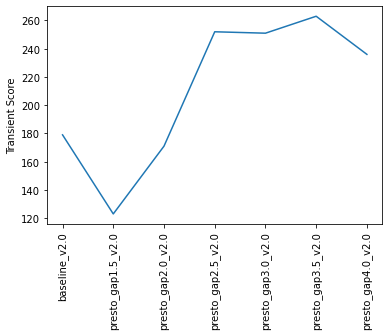

In [51]:
fig, ax = plt.subplots()
ax.plot(df['Sum PrestoKNe__scoreS  UserPointsSlicer'][runs])
ack = ax.tick_params('x',  rotation=90)
ax.set_ylabel('Transient Score')

Text(0, 0.5, 'N SNe')

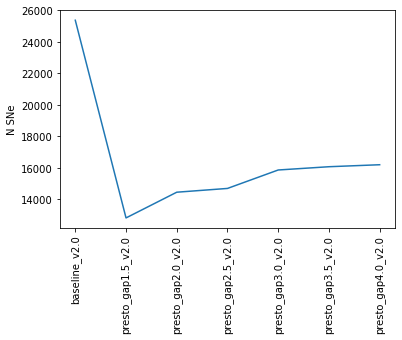

In [52]:
fig, ax = plt.subplots()
ax.plot(df['Total detected SNNSNMetric_nSN  HealpixSlicer'][runs])
ack = ax.tick_params('x',  rotation=90)
ax.set_ylabel('N SNe')

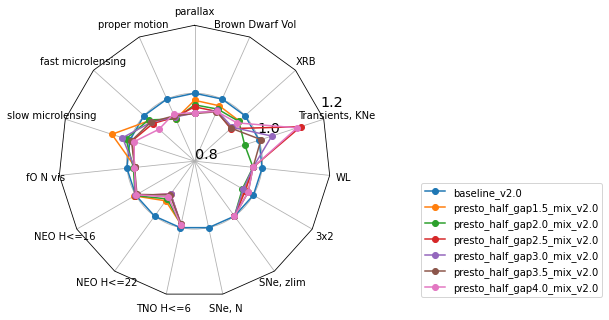

In [53]:
runs = ['baseline_v2.0'] + [run for run in df.index if 'presto_half' in run and 'mix' in run] 
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0')
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(2, 0))
fig.savefig('presto_half_mix.pdf', bbox_inches="tight")

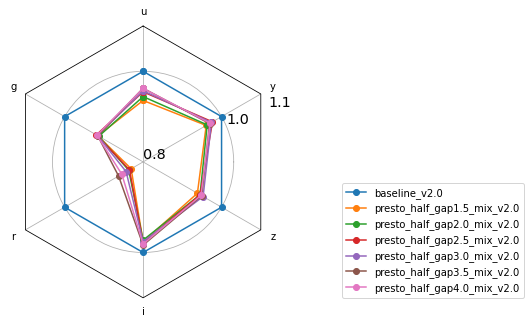

In [54]:
data_normed = norm_df(mag_data, runs, ['u', 'g', 'r', 'i', 'z', 'y'], norm_run='baseline_v2.0',
                      invert_cols=None, mag_cols='all')
#data_normed = data_normed.rename(columns=mag_name_mapper)

fig, ax = radar(data_normed, legend=True, rgrids=[.80, 1.0, 1.1], bbox_to_anchor=(1.9, 0))
fig.savefig('presto_half_mixed_mags.pdf', bbox_inches="tight")

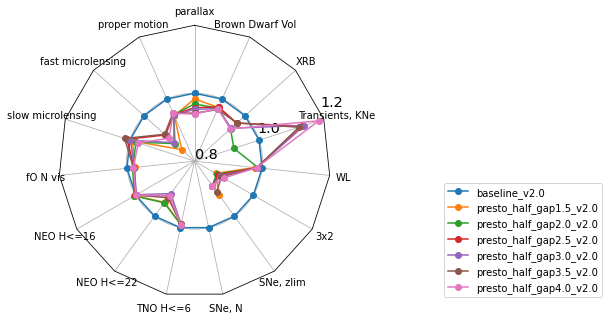

In [55]:
runs = ['baseline_v2.0'] + [run for run in df.index if 'presto_half' in run and 'mix' not in run] 
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0')
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(2, 0))
fig.savefig('presto_half_gaps.pdf', bbox_inches="tight")

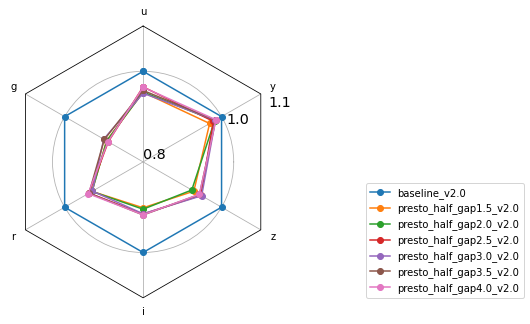

In [56]:
data_normed = norm_df(mag_data, runs, ['u', 'g', 'r', 'i', 'z', 'y'], norm_run='baseline_v2.0',
                      invert_cols=None, mag_cols='all')
#data_normed = data_normed.rename(columns=mag_name_mapper)

fig, ax = radar(data_normed, legend=True, rgrids=[.80, 1.0, 1.1], bbox_to_anchor=(1.9, 0))
fig.savefig('presto_half_mags.pdf', bbox_inches="tight")

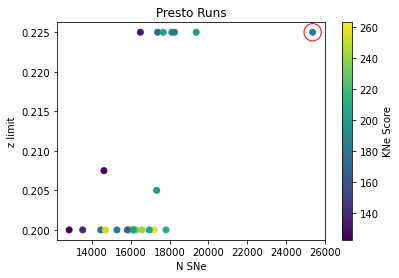

In [57]:
runs = ['baseline_v2.0'] + [run for run in df.index if 'presto' in run ] 

plt.scatter(df['Total detected SNNSNMetric_nSN  HealpixSlicer'].loc[runs],
            df['Median SNNSNMetric_zlim  HealpixSlicer'].loc[runs],
           c=df['Sum PrestoKNe__scoreS  UserPointsSlicer'].loc[runs])
plt.xlabel('N SNe')
plt.ylabel('z limit')
plt.title('Presto Runs')
cb = plt.colorbar()
cb.set_label('KNe Score')

plt.scatter(df['Total detected SNNSNMetric_nSN  HealpixSlicer'].loc[runs][0],
            df['Median SNNSNMetric_zlim  HealpixSlicer'].loc[runs][0],s=300, edgecolors='red', facecolors='none')

plt.savefig('presto_sne.pdf')

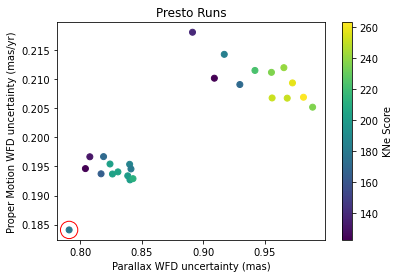

In [58]:
plt.scatter(df['best18k parallax  HealpixSlicer'].loc[runs],
            df['best18k properMotion  HealpixSlicer'].loc[runs],
           c=df['Sum PrestoKNe__scoreS  UserPointsSlicer'].loc[runs])
#plt.plot(df['best18k parallax  HealpixSlicer'].loc[runs][0],
#            df['best18k properMotion  HealpixSlicer'].loc[runs][0], marker='*', color='red')
cb = plt.colorbar()
cb.set_label('KNe Score')

plt.xlabel('Parallax WFD uncertainty (mas)')
plt.ylabel('Proper Motion WFD uncertainty (mas/yr)')
plt.title('Presto Runs')

plt.scatter(df['best18k parallax  HealpixSlicer'].loc[runs][0],
            df['best18k properMotion  HealpixSlicer'].loc[runs][0]
            ,s=300, edgecolors='red', facecolors='none')

plt.savefig('presto_astrom.pdf')

In [59]:
[col for col in df.columns if 'zlim' in col]

['Median SNNSNMetric_zlim  HealpixSlicer',
 'Mean SNNSNMetric_zlim  HealpixSlicer',
 'Total detected SNNSNMetric_zlim  HealpixSlicer',
 'Total on sky SNNSNMetric_zlim  HealpixSlicer',
 'Mean ELAISS1, SNe_zlim  HealpixSubsetSlicer',
 'Median ELAISS1, SNe_zlim  HealpixSubsetSlicer',
 'Sum ELAISS1, SNe_zlim  HealpixSubsetSlicer',
 'Mean XMM-LSS, SNe_zlim  HealpixSubsetSlicer',
 'Median XMM-LSS, SNe_zlim  HealpixSubsetSlicer',
 'Sum XMM-LSS, SNe_zlim  HealpixSubsetSlicer',
 'Mean ECDFS, SNe_zlim  HealpixSubsetSlicer',
 'Median ECDFS, SNe_zlim  HealpixSubsetSlicer',
 'Sum ECDFS, SNe_zlim  HealpixSubsetSlicer',
 'Mean COSMOS, SNe_zlim  HealpixSubsetSlicer',
 'Median COSMOS, SNe_zlim  HealpixSubsetSlicer',
 'Sum COSMOS, SNe_zlim  HealpixSubsetSlicer',
 'Mean EDFS, SNe_zlim  HealpixSubsetSlicer',
 'Median EDFS, SNe_zlim  HealpixSubsetSlicer',
 'Sum EDFS, SNe_zlim  HealpixSubsetSlicer']

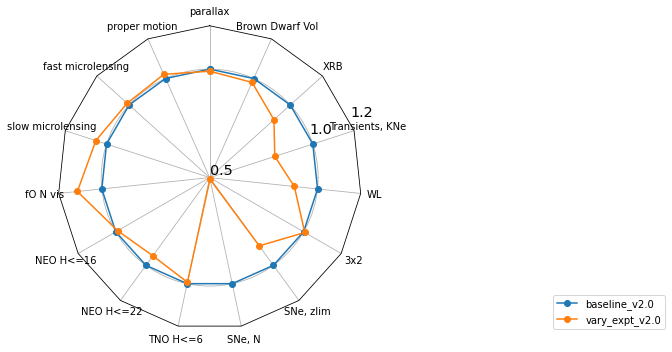

In [60]:
runs = ['baseline_v2.0'] + [run for run in df.index if 'vary_expt' in run] 
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0')
fig, ax = radar(ndata, legend=True, rgrids=[0.5, 1.0, 1.2], bbox_to_anchor=(2, 0))
fig.tight_layout()

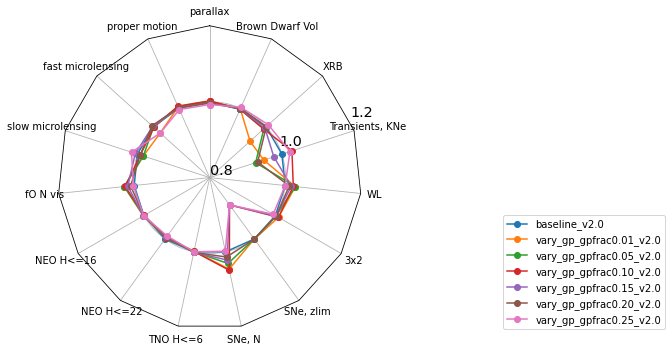

In [61]:
runs = ['baseline_v2.0'] + [run for run in df.index if 'vary_gp' in run] 
ndata = norm_df(data, runs[0:7], cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0')
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(2, 0))
fig.tight_layout()

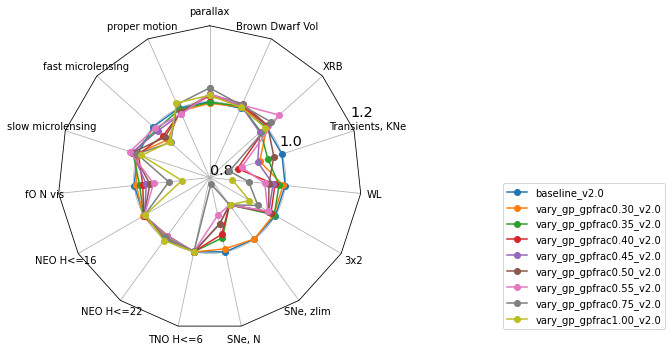

In [62]:

ndata = norm_df(data, [runs[0]] + runs[7:], cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0')
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(2, 0))
fig.tight_layout()

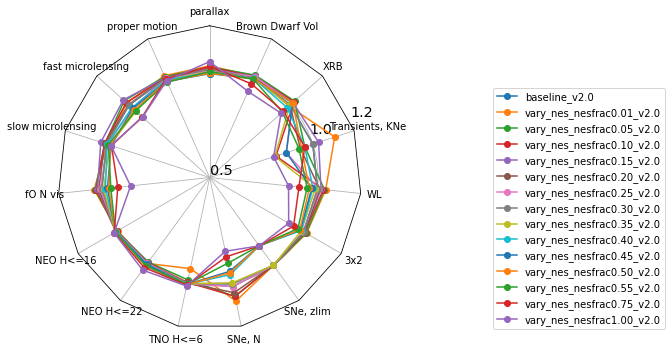

In [63]:
runs = ['baseline_v2.0'] + [run for run in df.index if 'vary_nes' in run] 
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0')
fig, ax = radar(ndata, legend=True, rgrids=[0.5, 1.0, 1.2], bbox_to_anchor=(2, 0))
fig.tight_layout()

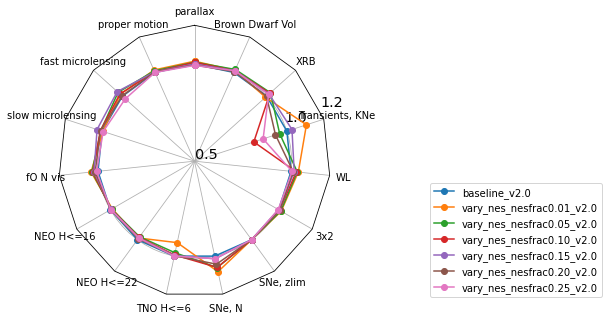

In [64]:
runs = ['baseline_v2.0'] + [run for run in df.index if 'vary_nes' in run] 
ndata = norm_df(data, runs[0:7], cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0')
fig, ax = radar(ndata, legend=True, rgrids=[0.5, 1.0, 1.2], bbox_to_anchor=(2, 0))
fig.savefig('vary_nes1.pdf', bbox_inches="tight")

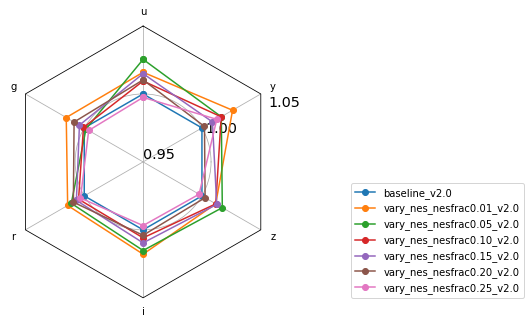

In [65]:
data_normed = norm_df(mag_data, runs[0:7], ['u', 'g', 'r', 'i', 'z', 'y'], norm_run='baseline_v2.0',
                      invert_cols=None, mag_cols='all')
#data_normed = data_normed.rename(columns=mag_name_mapper)

fig, ax = radar(data_normed, legend=True, rgrids=[.95, 1.0, 1.05], bbox_to_anchor=(1.9, 0))
fig.savefig('vary_nes_mags.pdf', bbox_inches="tight")

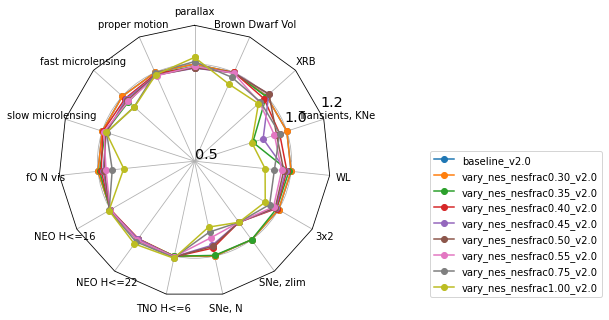

In [66]:
runs = ['baseline_v2.0'] + [run for run in df.index if 'vary_nes' in run][6:]
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0')
fig, ax = radar(ndata, legend=True, rgrids=[0.5, 1.0, 1.2], bbox_to_anchor=(2, 0))
fig.savefig('vary_nes2.pdf', bbox_inches="tight")

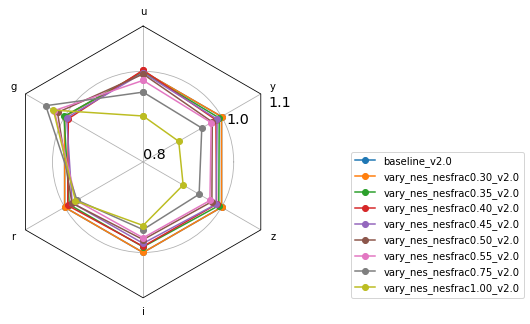

In [67]:
data_normed = norm_df(mag_data, runs, ['u', 'g', 'r', 'i', 'z', 'y'], norm_run='baseline_v2.0',
                      invert_cols=None, mag_cols='all')
#data_normed = data_normed.rename(columns=mag_name_mapper)

fig, ax = radar(data_normed, legend=True, rgrids=[.80, 1.0, 1.1], bbox_to_anchor=(1.9, 0))
fig.savefig('vary_nes_mags2.pdf', bbox_inches="tight")

In [68]:
data.loc[runs]

parallax  proper motion  fast microlensing  \
baseline_v2.0              0.791058       0.184088             0.1580   
vary_nes_nesfrac0.30_v2.0  0.791058       0.184088             0.1580   
vary_nes_nesfrac0.35_v2.0  0.800042       0.185509             0.1513   
vary_nes_nesfrac0.40_v2.0  0.803523       0.185504             0.1551   
vary_nes_nesfrac0.45_v2.0  0.808111       0.186730             0.1543   
vary_nes_nesfrac0.50_v2.0  0.806093       0.186873             0.1529   
vary_nes_nesfrac0.55_v2.0  0.799772       0.187616             0.1517   
vary_nes_nesfrac0.75_v2.0  0.780650       0.184629             0.1451   
vary_nes_nesfrac1.00_v2.0  0.764614       0.186223             0.1448   

                           slow microlensing  fO N vis  NEO H<=16  NEO H<=22  \
baseline_v2.0                         0.4284     839.0     0.9298   0.577476   
vary_nes_nesfrac0.30_v2.0             0.4284     839.0     0.9296   0.573687   
vary_nes_nesfrac0.35_v2.0             0.4215     832.0     0.9310   0.575208   
vary_nes_nesfrac0.40_v2.0             0.4270     825.0     0.9296   0.573868   
vary_nes_nesfrac0.45_v2.0             0.4188     817.0     0.9312   0.574496   
vary_nes_nesfrac0.50_v2.0             0.4209     811.0     0.9332   0.579126   
vary_nes_nesfrac0.55_v2.0             0.4244     804.0     0.9312   0.578524   
vary_nes_nesfrac0.75_v2.0             0.4181     777.0     0.9370   0.584949   
vary_nes_nesfrac1.00_v2.0             0.4192     727.0     0.9378   0.592835   

                           TNO H<=6     SNe, N  SNe, zlim        3x2     WL  \
baseline_v2.0              0.695976  25374.969      0.225  37.908126  186.0   
vary_nes_nesfrac0.30_v2.0  0.695976  25374.969      0.225  37.908126  186.0   
vary_nes_nesfrac0.35_v2.0  0.696167  25279.688      0.225  37.482975  184.0   
vary_nes_nesfrac0.40_v2.0  0.698204  24296.872      0.200  37.440052  182.0   
vary_nes_nesfrac0.45_v2.0  0.698193  23907.965      0.200  37.260553  181.0   
vary_nes_nesfrac0.50_v2.0  0.698870  24074.956      0.200  37.147729  179.0   
vary_nes_nesfrac0.55_v2.0  0.698305  22926.121      0.200  36.765826  177.0   
vary_nes_nesfrac0.75_v2.0  0.701021  22147.688      0.200  35.891727  170.0   
vary_nes_nesfrac1.00_v2.0  0.703778  21499.497      0.200  34.899788  161.0   

                           Transients, KNe     XRB  Brown Dwarf Vol  
baseline_v2.0                        179.0  1620.0    168086.074111  
vary_nes_nesfrac0.30_v2.0            179.0  1620.0    168086.074111  
vary_nes_nesfrac0.35_v2.0            146.0  1615.0    167943.251895  
vary_nes_nesfrac0.40_v2.0            172.0  1590.0    168149.994470  
vary_nes_nesfrac0.45_v2.0            156.0  1644.0    167966.688529  
vary_nes_nesfrac0.50_v2.0            169.0  1647.0    167586.898217  
vary_nes_nesfrac0.55_v2.0            167.0  1541.0    167424.509859  
vary_nes_nesfrac0.75_v2.0            172.0  1550.0    163544.153522  
vary_nes_nesfrac1.00_v2.0            145.0  1528.0    157124.638630

Text(0, 0.5, 'OCC_r5, H=16')

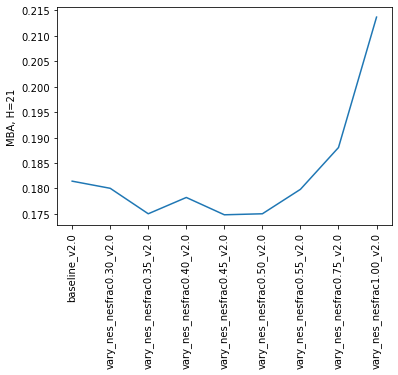

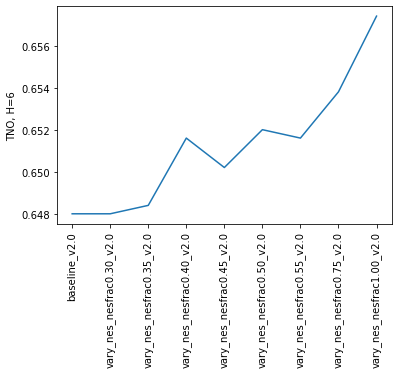

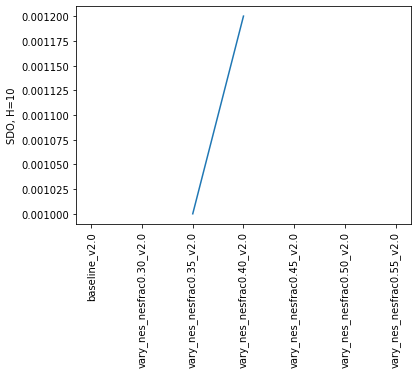

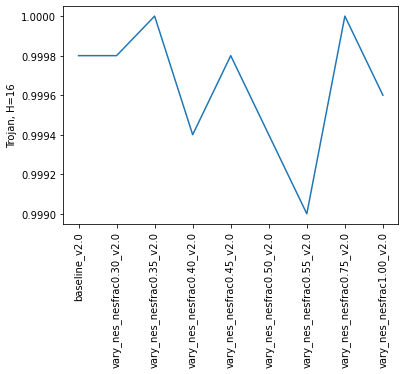

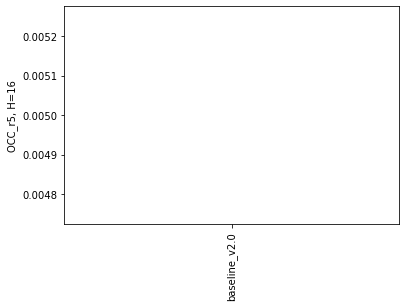

In [69]:
fig, ax = plt.subplots()
ax.plot(df['DifferentialCompleteness H = 21.000000 Discovery_N_Chances MBA 3 pairs in 15 nights trailing loss MoObjSlicer'][runs])
ack = ax.tick_params('x',  rotation=90)
ax.set_ylabel('MBA, H=21')

fig, ax = plt.subplots()
ax.plot(df['DifferentialCompleteness H = 6.000000 Discovery_N_Chances TNO 3 pairs in 15 nights trailing loss MoObjSlicer'][runs])
ack = ax.tick_params('x',  rotation=90)
ax.set_ylabel('TNO, H=6')

fig, ax = plt.subplots()
ax.plot(df['DifferentialCompleteness H = 10.000000 Discovery_N_Chances SDO 3 pairs in 15 nights trailing loss MoObjSlicer'][runs])
ack = ax.tick_params('x',  rotation=90)
ax.set_ylabel('SDO, H=10')

fig, ax = plt.subplots()
ax.plot(df['DifferentialCompleteness H = 16.000000 Discovery_N_Chances Trojan 3 pairs in 15 nights trailing loss MoObjSlicer'][runs])
ack = ax.tick_params('x',  rotation=90)
ax.set_ylabel('Trojan, H=16')

fig, ax = plt.subplots()
ax.plot(df['DifferentialCompleteness H = 16.000000 Discovery_N_Chances OCC_r20 3 pairs in 15 nights trailing loss MoObjSlicer'][runs])
ack = ax.tick_params('x',  rotation=90)
ax.set_ylabel('OCC_r5, H=16')

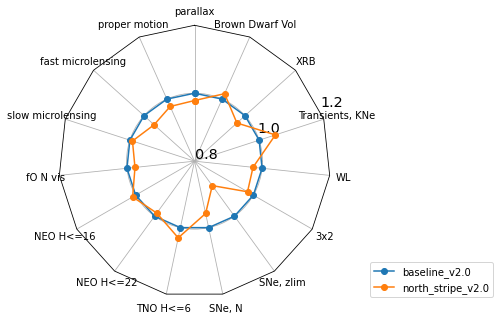

In [70]:
runs = ['baseline_v2.0'] + [run for run in df.index if 'north' in run] 
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0')
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(1.6, 0))
fig.savefig('north_stripe.pdf', bbox_inches="tight")

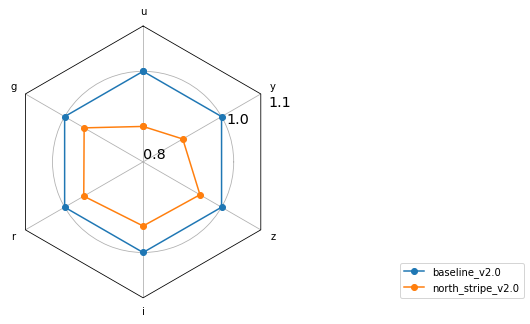

In [71]:
data_normed = norm_df(mag_data, runs, ['u', 'g', 'r', 'i', 'z', 'y'], norm_run='baseline_v2.0',
                      invert_cols=None, mag_cols='all')
#data_normed = data_normed.rename(columns=mag_name_mapper)

fig, ax = radar(data_normed, legend=True, rgrids=[.80, 1.0, 1.1], bbox_to_anchor=(1.9, 0))
fig.savefig('north_stripe_mags.pdf', bbox_inches="tight")

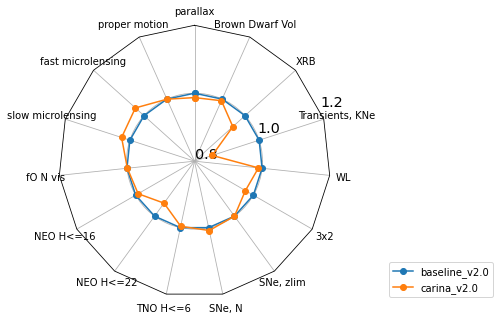

In [72]:
runs = ['baseline_v2.0'] + [run for run in df.index if 'carina' in run] 
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0')
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(1.6, 0))
fig.savefig('carina.pdf', bbox_inches="tight")

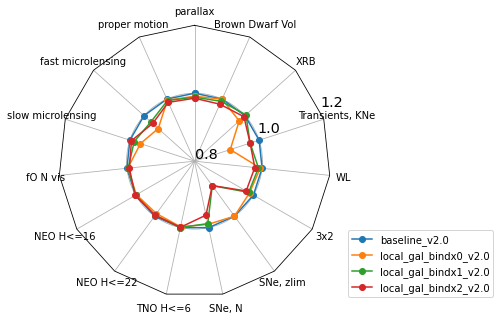

In [73]:
runs = ['baseline_v2.0'] + [run for run in df.index if 'local' in run] 
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0')
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(1.6, 0))
fig.savefig('local_gals.pdf', bbox_inches="tight")

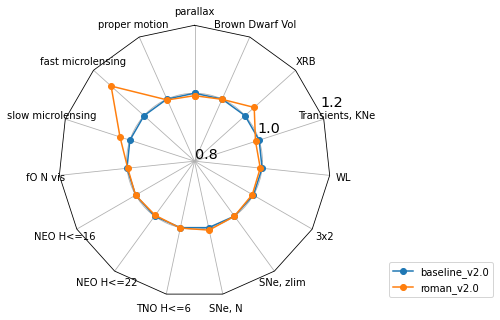

In [74]:
runs = ['baseline_v2.0'] + [run for run in df.index if 'roman' in run] 
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0')
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(1.6, 0))
fig.savefig('roman.pdf', bbox_inches="tight")

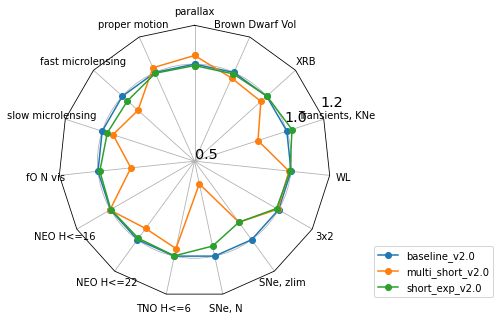

In [75]:
runs = ['baseline_v2.0'] + [run for run in df.index if 'short' in run] 
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0')
fig, ax = radar(ndata, legend=True, rgrids=[0.5, 1.0, 1.2], bbox_to_anchor=(1.6, 0))
fig.savefig('short_exp.pdf', bbox_inches="tight")

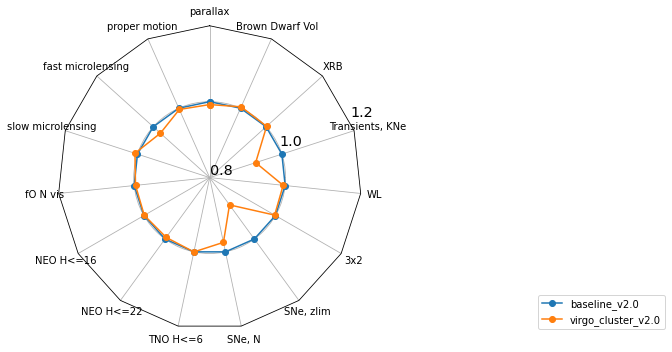

In [76]:
runs = ['baseline_v2.0'] + [run for run in df.index if 'virgo' in run] 
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0')
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(2, 0))
fig.tight_layout()

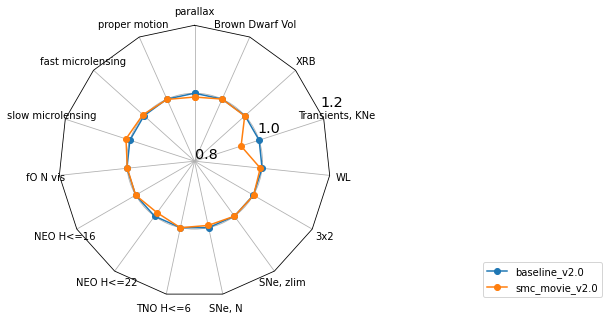

In [77]:
runs = ['baseline_v2.0'] + [run for run in df.index if 'smc' in run] 
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0')
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(2, 0))
fig.savefig('smc_movie.pdf', bbox_inches="tight")

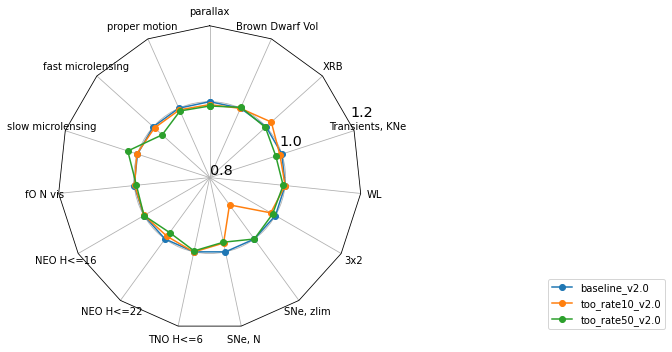

In [78]:
runs = ['baseline_v2.0'] + [run for run in df.index if 'too' in run] 
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0')
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(2, 0))
fig.tight_layout()

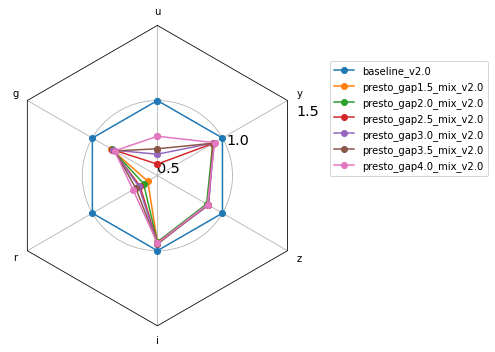

In [79]:
runs = ['baseline_v2.0'] + [run for run in df.index if 'presto_gap' in run and 'mix' in run] 

data_normed = norm_df(mag_data, runs, ['u', 'g', 'r', 'i', 'z', 'y'], norm_run='baseline_v2.0',
                      invert_cols=None, mag_cols='all')
#data_normed = data_normed.rename(columns=mag_name_mapper)

fig, ax = radar(data_normed, legend=True, rgrids=[.50, 1.0, 1.5], alpha=.1)
fig.tight_layout()

In [80]:
mag_data.loc[runs]

u          g          r          i          z  \
baseline_v2.0           25.818916  26.733479  26.755971  26.218659  25.510379   
presto_gap1.5_mix_v2.0  25.102174  26.590934  26.330134  26.161797  25.399538   
presto_gap2.0_mix_v2.0  25.302785  26.582534  26.362610  26.160226  25.388431   
presto_gap2.5_mix_v2.0  25.395437  26.580526  26.390830  26.165516  25.403116   
presto_gap3.0_mix_v2.0  25.461368  26.572308  26.399548  26.171755  25.401906   
presto_gap3.5_mix_v2.0  25.497458  26.562218  26.422237  26.175466  25.396260   
presto_gap4.0_mix_v2.0  25.580833  26.562637  26.443690  26.167508  25.395612   

                                y  
baseline_v2.0           24.762720  
presto_gap1.5_mix_v2.0  24.687339  
presto_gap2.0_mix_v2.0  24.688675  
presto_gap2.5_mix_v2.0  24.692265  
presto_gap3.0_mix_v2.0  24.699431  
presto_gap3.5_mix_v2.0  24.694561  
presto_gap4.0_mix_v2.0  24.701756

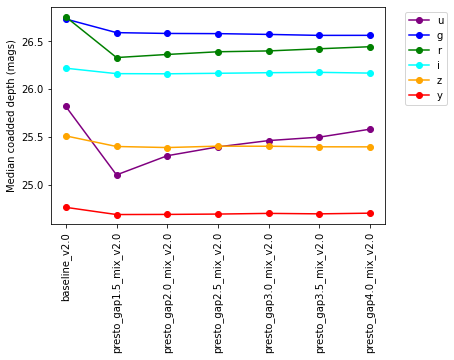

In [81]:
f2c = {'u': 'purple', 'g': 'blue', 'r': 'green',
       'i': 'cyan', 'z': 'orange', 'y': 'red'}
fig, ax = plt.subplots()
for filtername in 'ugrizy':
    ax.plot(mag_data.loc[runs][filtername], label=filtername, color=f2c[filtername], marker='o')
ack = ax.tick_params('x',  rotation=90)
ax.set_ylabel('Median coadded depth (mags)')
ax.legend(bbox_to_anchor=(1.2, 1.0))

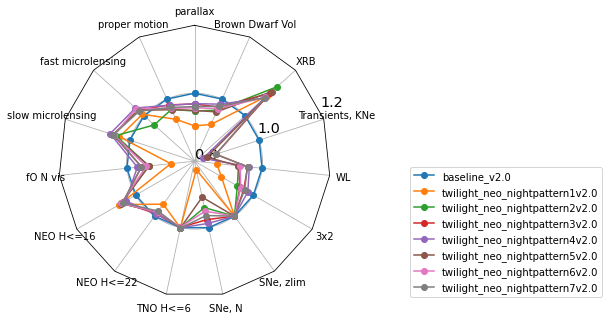

In [82]:
runs = ['baseline_v2.0'] + [run for run in df.index if 'twili' in run] 
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0')
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(2, 0))
fig.savefig('twilight.pdf', bbox_inches="tight")

In [111]:
df['CumulativeCompleteness H <= 20.000000 Discovery_N_Chances Vatira 3 pairs in 15 nights detection loss MoObjSlicer']

baseline_retrofoot_v2.0           NaN
baseline_v2.0                     NaN
bluer_indx0_v2.0                  NaN
bluer_indx1_v2.0                  NaN
carina_v2.0                       NaN
                               ...   
twi_neo_nightpattern3v2.1    0.002585
twi_neo_nightpattern4v2.1    0.001174
twi_neo_nightpattern5v2.1    0.004674
twi_neo_nightpattern6v2.1    0.002852
twi_neo_nightpattern7v2.1    0.002585
Name: CumulativeCompleteness H <= 20.000000 Discovery_N_Chances Vatira 3 pairs in 15 nights detection loss MoObjSlicer, Length: 274, dtype: float64

In [83]:
data.loc[runs]

parallax  proper motion  fast microlensing  \
baseline_v2.0                   0.791058       0.184088             0.1580   
twilight_neo_nightpattern1v2.0  0.875151       0.196896             0.1590   
twilight_neo_nightpattern2v2.0  0.834827       0.190420             0.1516   
twilight_neo_nightpattern3v2.0  0.816851       0.187588             0.1618   
twilight_neo_nightpattern4v2.0  0.816124       0.187829             0.1634   
twilight_neo_nightpattern5v2.0  0.833112       0.190596             0.1617   
twilight_neo_nightpattern6v2.0  0.826466       0.189733             0.1630   
twilight_neo_nightpattern7v2.0  0.823417       0.189163             0.1611   

                                slow microlensing  fO N vis  NEO H<=16  \
baseline_v2.0                              0.4284     839.0     0.9298   
twilight_neo_nightpattern1v2.0             0.4422     730.0     0.9810   
twilight_neo_nightpattern2v2.0             0.4470     785.0     0.9752   
twilight_neo_nightpattern3v2.0             0.4504     803.0     0.9696   
twilight_neo_nightpattern4v2.0             0.4545     813.0     0.9618   
twilight_neo_nightpattern5v2.0             0.4509     784.0     0.9756   
twilight_neo_nightpattern6v2.0             0.4494     791.0     0.9750   
twilight_neo_nightpattern7v2.0             0.4502     803.0     0.9714   

                                NEO H<=22  TNO H<=6     SNe, N  SNe, zlim  \
baseline_v2.0                    0.577476  0.695976  25374.969      0.225   
twilight_neo_nightpattern1v2.0   0.552385  0.696200  20953.825      0.225   
twilight_neo_nightpattern2v2.0   0.569429  0.695859  23844.679      0.225   
twilight_neo_nightpattern3v2.0   0.572661  0.695482  24760.890      0.225   
twilight_neo_nightpattern4v2.0   0.572673  0.696283  25056.156      0.225   
twilight_neo_nightpattern5v2.0   0.568668  0.696958  23049.196      0.225   
twilight_neo_nightpattern6v2.0   0.568978  0.694936  24115.741      0.225   
twilight_neo_nightpattern7v2.0   0.566907  0.697272  24451.653      0.225   

                                      3x2     WL  Transients, KNe     XRB  \
baseline_v2.0                   37.908126  186.0            179.0  1620.0   
twilight_neo_nightpattern1v2.0  33.789185  161.0            138.0  1759.0   
twilight_neo_nightpattern2v2.0  35.845149  173.0            139.0  1827.0   
twilight_neo_nightpattern3v2.0  36.676457  178.0            155.0  1780.0   
twilight_neo_nightpattern4v2.0  37.191955  179.0            148.0  1745.0   
twilight_neo_nightpattern5v2.0  36.176128  173.0            150.0  1792.0   
twilight_neo_nightpattern6v2.0  36.272295  174.0            141.0  1751.0   
twilight_neo_nightpattern7v2.0  36.768819  178.0            155.0  1749.0   

                                Brown Dwarf Vol  
baseline_v2.0                     168086.074111  
twilight_neo_nightpattern1v2.0    154351.417123  
twilight_neo_nightpattern2v2.0    162087.778424  
twilight_neo_nightpattern3v2.0    163754.285876  
twilight_neo_nightpattern4v2.0    165354.484623  
twilight_neo_nightpattern5v2.0    161144.691863  
twilight_neo_nightpattern6v2.0    162983.877983  
twilight_neo_nightpattern7v2.0    164277.011171

In [84]:
data.loc[runs].to_latex()

'\\begin{tabular}{lrrrrrrrrrrrrrrr}\n\\toprule\n{} &  parallax &  proper motion &  fast microlensing &  slow microlensing &  fO N vis &  NEO H<=16 &  NEO H<=22 &  TNO H<=6 &     SNe, N &  SNe, zlim &        3x2 &     WL &  Transients, KNe &     XRB &  Brown Dwarf Vol \\\\\n\\midrule\nbaseline\\_v2.0                  &  0.791058 &       0.184088 &             0.1580 &             0.4284 &     839.0 &     0.9298 &   0.577476 &  0.695976 &  25374.969 &      0.225 &  37.908126 &  186.0 &            179.0 &  1620.0 &    168086.074111 \\\\\ntwilight\\_neo\\_nightpattern1v2.0 &  0.875151 &       0.196896 &             0.1590 &             0.4422 &     730.0 &     0.9810 &   0.552385 &  0.696200 &  20953.825 &      0.225 &  33.789185 &  161.0 &            138.0 &  1759.0 &    154351.417123 \\\\\ntwilight\\_neo\\_nightpattern2v2.0 &  0.834827 &       0.190420 &             0.1516 &             0.4470 &     785.0 &     0.9752 &   0.569429 &  0.695859 &  23844.679 &      0.225 &  35.845149 &  173

In [85]:
df['DifferentialCompleteness H = 17.000000 Discovery_N_Chances Trojan 3 pairs in 15 nights trailing loss MoObjSlicer']

baseline_retrofoot_v2.0      0.5070
baseline_v2.0                0.5154
bluer_indx0_v2.0             0.4844
bluer_indx1_v2.0             0.4538
carina_v2.0                  0.4864
                              ...  
twi_neo_nightpattern3v2.1    0.5150
twi_neo_nightpattern4v2.1    0.4812
twi_neo_nightpattern5v2.1    0.4728
twi_neo_nightpattern6v2.1    0.4926
twi_neo_nightpattern7v2.1    0.4786
Name: DifferentialCompleteness H = 17.000000 Discovery_N_Chances Trojan 3 pairs in 15 nights trailing loss MoObjSlicer, Length: 274, dtype: float64

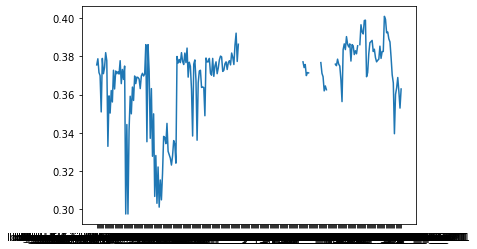

In [86]:
plt.plot(df['DifferentialCompleteness H = 22.000000 Discovery_N_Chances NEO 3 pairs in 15 nights trailing loss MoObjSlicer'])

In [87]:
# is there anything to see in the periodic star stuff?
[name for name in df.columns if 'Modula' in name]

['Mean PeriodicStarModulationMetric dm 18 interval 15 RRc HealpixSlicer',
 'Median PeriodicStarModulationMetric dm 18 interval 15 RRc HealpixSlicer',
 'Max PeriodicStarModulationMetric dm 18 interval 15 RRc HealpixSlicer',
 'Mean PeriodicStarModulationMetric dm 19 interval 15 RRc HealpixSlicer',
 'Median PeriodicStarModulationMetric dm 19 interval 15 RRc HealpixSlicer',
 'Max PeriodicStarModulationMetric dm 19 interval 15 RRc HealpixSlicer',
 'Mean PeriodicStarModulationMetric dm 20 interval 15 RRc HealpixSlicer',
 'Median PeriodicStarModulationMetric dm 20 interval 15 RRc HealpixSlicer',
 'Max PeriodicStarModulationMetric dm 20 interval 15 RRc HealpixSlicer',
 'Mean PeriodicStarModulationMetric dm 21 interval 15 RRc HealpixSlicer',
 'Median PeriodicStarModulationMetric dm 21 interval 15 RRc HealpixSlicer',
 'Max PeriodicStarModulationMetric dm 21 interval 15 RRc HealpixSlicer',
 'Mean PeriodicStarModulationMetric dm 18 interval 30 RRc HealpixSlicer',
 'Median PeriodicStarModulationMet

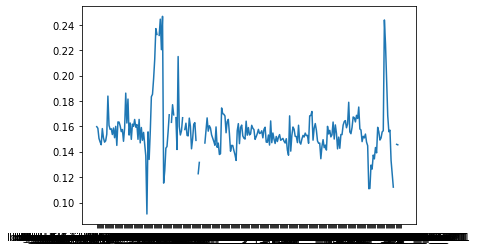

In [88]:
plt.plot(df['Median PeriodicStarModulationMetric dm 18 interval 15 RRc HealpixSlicer'])

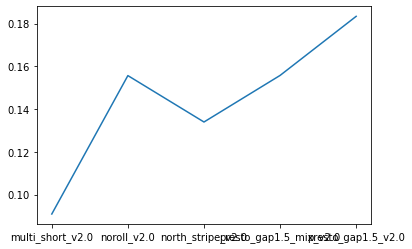

In [89]:
plt.plot(df['Median PeriodicStarModulationMetric dm 18 interval 15 RRc HealpixSlicer'][45:50])

In [90]:
df.index[45:50]

Index(['multi_short_v2.0', 'noroll_v2.0', 'north_stripe_v2.0',
       'presto_gap1.5_mix_v2.0', 'presto_gap1.5_v2.0'],
      dtype='object')

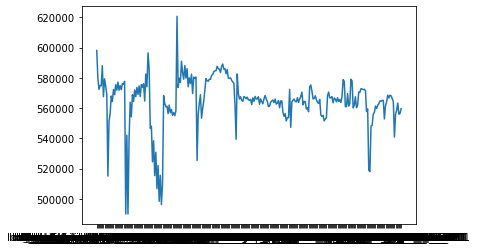

In [91]:
plt.plot(df['VolumeSum Brown Dwarf, L4  HealpixSlicer'])

In [92]:
df.index[np.where(df['VolumeSum Brown Dwarf, L4  HealpixSlicer'] < 540000)]

Index(['long_gaps_nightsoff0_delayed-1_v2.0',
       'long_gaps_np_nightsoff0_delayed-1_v2.0',
       'long_gaps_np_nightsoff0_v2.0', 'presto_gap2.0_mix_v2.0',
       'presto_gap2.0_v2.0', 'presto_gap2.5_mix_v2.0', 'presto_gap2.5_v2.0',
       'presto_gap3.0_mix_v2.0', 'presto_gap3.0_v2.0',
       'presto_gap3.5_mix_v2.0', 'presto_gap3.5_v2.0',
       'presto_gap4.0_mix_v2.0', 'presto_gap4.0_v2.0',
       'twilight_neo_nightpattern1v2.0', 'vary_nes_nesfrac1.00_v2.0',
       'plane_priority_priority0.1_pbf_v2.1',
       'plane_priority_priority0.1_pbt_v2.1'],
      dtype='object')

In [93]:
# Let's make a pretty table with all the raw values if folks want to see them.

In [94]:
old_indx = list(data.index)
new_indx = [old_indx[1]] + [old_indx[0]] + old_indx[2:]

In [95]:
data = data.reindex(new_indx)



In [96]:
# Can we add some units to the columns

new_cols = {'parallax': 'parallax (mas)', 
            'proper motion': 'proper motion (mas/yr)',
            'fast microlensing': 'fast microlensing (frac)',
            'slow microlensing': 'slow microlensing (frac)',
            'fO N vis': 'fO N vis (#)',
            'NEO bright': 'NEO bright (frac)',
            'NEO faint': 'NEO faint (frac)',
            'TNO': 'TNO (frac)',
            'SNe': 'SNe (N<z_lim)',
            'SNe, zlim': 'SNe, zlim (z)',
            '3x2': '3x2 (?)',
            'WL': 'WL (?)',
            'Transients, KNe': 'Transients, KNe (frac)',
            'XRB': 'XRB (#)',
            'Brown Dwarf Vol': 'Brown Dwarf Vol (pc^3)'}
data = data.rename(columns=new_cols)

# Giant table with all the raw values of metrics

In [97]:
#print(data.to_latex(float_format='%.2f', index=True).replace('NaN', '-').replace('.00 ', ' '))
with pd.option_context('display.max_rows', None,):
   display(data)

parallax (mas)  \
baseline_v2.0                                    0.791058   
baseline_retrofoot_v2.0                          0.771444   
bluer_indx0_v2.0                                 0.786251   
bluer_indx1_v2.0                                 0.791154   
carina_v2.0                                      0.801389   
ddf_frac_ddf_per0.6_v2.0                         0.787326   
ddf_frac_ddf_per1.6_v2.0                         0.818906   
local_gal_bindx0_v2.0                            0.798058   
local_gal_bindx1_v2.0                            0.800403   
local_gal_bindx2_v2.0                            0.802885   
long_gaps_nightsoff0_delayed-1_v2.0              0.917052   
long_gaps_nightsoff0_delayed1827_v2.0            0.839009   
long_gaps_nightsoff1_delayed-1_v2.0              0.815683   
long_gaps_nightsoff1_delayed1827_v2.0            0.800510   
long_gaps_nightsoff2_delayed-1_v2.0              0.807977   
long_gaps_nightsoff2_delayed1827_v2.0            0.797148   
long_gaps_nightsoff3_delayed-1_v2.0              0.801847   
long_gaps_nightsoff3_delayed1827_v2.0            0.797483   
long_gaps_nightsoff4_delayed-1_v2.0              0.802705   
long_gaps_nightsoff4_delayed1827_v2.0            0.793870   
long_gaps_nightsoff5_delayed-1_v2.0              0.797119   
long_gaps_nightsoff5_delayed1827_v2.0            0.795873   
long_gaps_nightsoff6_delayed-1_v2.0              0.798429   
long_gaps_nightsoff6_delayed1827_v2.0            0.796396   
long_gaps_nightsoff7_delayed-1_v2.0              0.797306   
long_gaps_nightsoff7_delayed1827_v2.0            0.796250   
long_gaps_np_nightsoff0_delayed-1_v2.0           0.950535   
long_gaps_np_nightsoff0_delayed1827_v2.0         0.852641   
long_gaps_np_nightsoff0_v2.0                     0.950535   
long_gaps_np_nightsoff1_delayed-1_v2.0           0.836247   
long_gaps_np_nightsoff1_delayed1827_v2.0         0.812300   
long_gaps_np_nightsoff2_delayed-1_v2.0           0.811691   
long_gaps_np_nightsoff2_delayed1827_v2.0         0.804199   
long_gaps_np_nightsoff3_delayed-1_v2.0           0.801947   
long_gaps_np_nightsoff3_delayed1827_v2.0         0.798601   
long_gaps_np_nightsoff4_delayed-1_v2.0           0.807426   
long_gaps_np_nightsoff4_delayed1827_v2.0         0.799831   
long_gaps_np_nightsoff5_delayed-1_v2.0           0.804740   
long_gaps_np_nightsoff5_delayed1827_v2.0         0.799502   
long_gaps_np_nightsoff6_delayed-1_v2.0           0.805986   
long_gaps_np_nightsoff6_delayed1827_v2.0         0.797170   
long_gaps_np_nightsoff7_delayed-1_v2.0           0.802289   
long_gaps_np_nightsoff7_delayed1827_v2.0         0.794268   
long_u1_v2.0                                     0.806733   
long_u2_v2.0                                     0.804994   
multi_short_v2.0                                 0.757357   
noroll_v2.0                                      0.779727   
north_stripe_v2.0                                0.808429   
presto_gap1.5_mix_v2.0                           0.891196   
presto_gap1.5_v2.0                               0.908933   
presto_gap2.0_mix_v2.0                           0.916967   
presto_gap2.0_v2.0                               0.929619   
presto_gap2.5_mix_v2.0                           0.941877   
presto_gap2.5_v2.0                               0.955799   
presto_gap3.0_mix_v2.0                           0.955276   
presto_gap3.0_v2.0                               0.968074   
presto_gap3.5_mix_v2.0                           0.965355   
presto_gap3.5_v2.0                               0.981269   
presto_gap4.0_mix_v2.0                           0.972339   
presto_gap4.0_v2.0                               0.988680   
presto_half_gap1.5_mix_v2.0                      0.807867   
presto_half_gap1.5_v2.0                          0.804286   
presto_half_gap2.0_mix_v2.0                      0.819000   
presto_half_gap2.0_v2.0                          0.816983   
presto_half_gap2.5_mix_v2.0                      0.824234   
presto_half_gap2.